
<p style="display:block;text-align:center;font-weight:700;font-size:40px">
  <em>Эссе №1</em>
</p>

<p style="display:block;text-align:center;font-style:italic;font-weight:700;font-size:40px">
  <em>MaxEnt-распределение потоков (OD) с «стоимостью» поездки</em>
</p>

## **Теория**

##### **Энтропия Шеннона**

**Определение (дискретный случай, биты):**  
$ H(P) = -\sum_i p_i \log_2 p_i $, где $P=\{p_i\}$, $\sum_i p_i = 1$, $p_i \ge 0$. По соглашению $0\log 0 := 0$.

**Единицы измерения:** биты при $\log_2$, «наты» при $\ln$. Пересчёт: $H_{\text{nat}} = (\ln 2)\,H_{\text{bit}}$.

**Диапазон значений:** $0 \le H(P) \le \log_2 |\mathcal{X}|$. Минимум (0) при вырожденном распределении, максимум при равномерном.

**Полезные формы:**
- **Двоичная энтропия:** $ h_2(p) = -p\log_2 p - (1-p)\log_2(1-p) $ (максимум в $p=1/2$).
- **Условная энтропия:** $ H(Y|X) = \sum_x p(x) H(P_{Y|X=x}) \ge 0 $.
- **Правило цепочки:** $ H(X,Y) = H(X) + H(Y|X) = H(Y) + H(X|Y) $.

**Свойства:**
- **Вогнутость:** $ H(\lambda P + (1-\lambda)Q) \ge \lambda H(P) + (1-\lambda)H(Q) $.
- **Аддитивность для независимых:** если $X_1,\dots,X_n$ независимы, то $H(X_{1:n})=\sum_k H(X_k)$.
- **Непрерывность:** малые изменения $P$ дают малые изменения $H(P)$.


##### **KL-дивергенция (расстояние Кульбака–Лейблера)**

**Определение (в битах):**  
$ D(P\|Q) = \sum_i p_i \log_2 \frac{p_i}{q_i} $.  
Если для некоторого $i$: $p_i>0$ и $q_i=0$, то $D(P\|Q)=\infty$.

**Интерпретация:** мера «несоответствия» модели $Q$ истинному распределению $P$; **несимметрична** и **не является метрикой**.

**Ключевые факты:**
- **Неотрицательность (Йенсен/Гиббс):** $ D(P\|Q) \ge 0 $ и равна 0 тогда и только тогда, когда $P=Q$.
- **Аддитивность по независимым компонентам:** $ D(P_1\times P_2 \,\|\, Q_1\times Q_2) = D(P_1\|Q_1) + D(P_2\|Q_2) $.
- **Выпуклость:** выпукла по паре $(P,Q)$ и по каждому аргументу в отдельности.

**Частный случай (Бернулли):**  
$ D(\mathrm{Bern}(q)\,\|\,\mathrm{Bern}(p)) = q\log_2\frac{q}{p} + (1-q)\log_2\frac{1-q}{1-p} $.

**Малые отклонения (квадратичная аппроксимация):**  
при $p_i = q_i + \delta_i$ и малых $\delta_i$:  
$ D_{\text{nat}}(P\|Q) \approx \tfrac{1}{2}\sum_i \frac{\delta_i^2}{q_i} $,  
$ D_{\text{bit}}(P\|Q) \approx \dfrac{1}{2\ln 2}\sum_i \frac{\delta_i^2}{q_i} $.


##### **Связь энтропии, кросс-энтропии и KL**   
**Кросс-энтропия:** $ H(P,Q) = -\sum_i p_i \log_2 q_i $.  
**Тождество:** $ H(P,Q) = H(P) + D(P\|Q) $.  
**Следствие (кодирование):** средняя длина кода, рассчитанного под модель $Q$, при источнике $P$ равна оптимальной $H(P)$ **плюс штраф** $D(P\|Q)$ за неверную модель.


## **Практика**

Хотим построить распределение потоков между районами $𝑊$ по принципу максимума энтропии при заданных суммах выездов $𝑟$ и приездов $𝑐$, и посмотреть, как параметр $𝛽$ (штраф за расстояние/стоимость) меняет структуру потоков.

**Дано:** векторы выездов $r$, приездов $c$ и матрица “цен” $C$ (расстояние/время). Неизвестна матрица потоков $W$ (кто куда поехал).

**Цель:** восстановить $W$, которое:
- строго соответствует данным (суммы по строкам = $r$, по столбцам = $c$),
- максимально “нейтрально” (имеет наибольшую энтропию т е делает меньше всего лишних предположений),
- учитывает нежелание дальних поездок через параметр чувствительности $\beta$.

**Метод (MaxEnt):** считаем
$$p_{jk} \propto a_j\,e^{-\beta\,C_{jk}}\,b_k,$$
где масштабы $a,b$ подбираем итеративно (IPFP).

**Что считаем:**
- **Средняя стоимость** $\bar c(W)=\frac{\sum_{j,k} W_{jk}C_{jk}}{\sum_{j,k}W_{jk}}$,
- **Энтропия** $H(W)=-\sum_{j,k} P_{jk}\log_2 P_{jk}$, где $P=W/\sum W$,

**Ожидаемые выводы:**
- При $\beta=0$: $W$ близко к $r\,c^\top/N$, **$H$ максимум**, **$\bar c$ максимум**.
- При росте $\beta$: потоки концентрируются на “близких” парах, **$\bar c(\beta)$ убывает**, **$H(\beta)$ убывает**.

**Практический смысл:** $\beta$ — ручка “чувствительности к расстоянию”; её калибруют так, чтобы $\bar c(W)$ совпала с наблюдаемой средней длиной/временем поездки.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist

#np.random.seed(42)

In [57]:
def entropy_from_counts(W):
    '''Энтропия Шеннона'''
    total = W.sum()
    P = W / total
    mask = P > 0 # маска оставляет только элементы с P_{jk}>0 (boolean indexing)
    return -np.sum(P[mask] * (np.log(P[mask]) / np.log(2.0)))

def kl_from_probs(P, Q, base=2.0):
    '''KL-дивергенция'''
    assert P.shape == Q.shape
    mask = P > 0
    if np.any(Q[mask] <= 0):
        return np.inf # модель запрещает то что реально случается
    logs = np.log(P[mask] / Q[mask]) / np.log(base)
    return np.sum(P[mask] * logs)

def ipfp_with_kernel(K, r, c, max_iter=20000, tol=1e-10):
    '''IPFP'''
    m, n = K.shape
    u = np.ones(m)
    v = np.ones(n)
    for it in range(max_iter):
        Kv = K @ v
        Kv = np.maximum(Kv, 1e-300)
        u = r / Kv
        Ku = K.T @ u
        Ku = np.maximum(Ku, 1e-300)
        v = c / Ku
        W = (u[:, None]) * K * (v[None, :])
        if it % 10 == 0:
            row_err = np.max(np.abs(W.sum(axis=1) - r))
            col_err = np.max(np.abs(W.sum(axis=0) - c))
            if max(row_err, col_err) < tol:
                return W, it+1
    return W, max_iter

def mean_cost(W, C):
    '''средняя стоимость поездки'''
    return (W * C).sum() / W.sum()

In [58]:
''' Данные: зоны, дистанции и маршруты '''

m = n = 10  
orig = np.random.rand(m, 2) * 10.0
dest = np.random.rand(n, 2) * 10.0
C = cdist(orig, dest, metric='euclidean')

N_total = 30000.0 # общее число поездок
r = np.random.dirichlet(np.ones(m)) * N_total
c = np.random.dirichlet(np.ones(n)) * N_total # задаем случайно векторы выездов и приездов

# балансируем суммы r и c точно
diff = r.sum() - c.sum() # могут различаться из-за численных погрешностей
if diff > 0:
    c[-1] += diff
else:
    r[-1] -= diff

print("Sum r:", r.sum(), "Sum c:", c.sum(), "C shape:", C.shape)

Sum r: 30000.0 Sum c: 30000.0 C shape: (10, 10)


In [59]:
# скан по β
betas = [0.0, 0.1, 0.2, 0.4, 0.8, 0.9, 1.0, 1.5, 3.0, 5.0, 8.0] # единицы измерения β - обратны к C
rows = []
Ws = {}

for beta in betas:
    K = np.exp(-beta * C) # ядро: ченм большен стоимость, тем меньше элемент ядра
    W, iters = ipfp_with_kernel(K, r, c) # решаем IPFP чтобы суммы по строкам давали r а по столбцам c
    H = entropy_from_counts(W) # энтропия в битах
    mc = mean_cost(W, C) # средняя стоимость
    rows.append({"beta": beta, "entropy_bits": H, "mean_cost": mc, "iters": iters})
    Ws[beta] = W

df_scan = pd.DataFrame(rows)
df_scan


,beta,entropy_bits,mean_cost,iters
0,0.0,5.822838,5.883847,1
1,0.1,5.767977,5.112006,21
2,0.2,5.632055,4.473919,21
3,0.4,5.310644,3.699528,51
4,0.8,4.836903,3.113734,131
5,0.9,4.752019,3.044345,161
6,1.0,4.677691,2.989999,181
7,1.5,4.425302,2.844925,321
8,3.0,4.115529,2.739929,521
9,5.0,3.940360,2.707790,711


Заметим: при увеличении $β$ растет количество итераций, потребовавшееся до сходимости, т к матрица ядра становится очень контрастной - одни элементы почти нули, другие заметно больше.

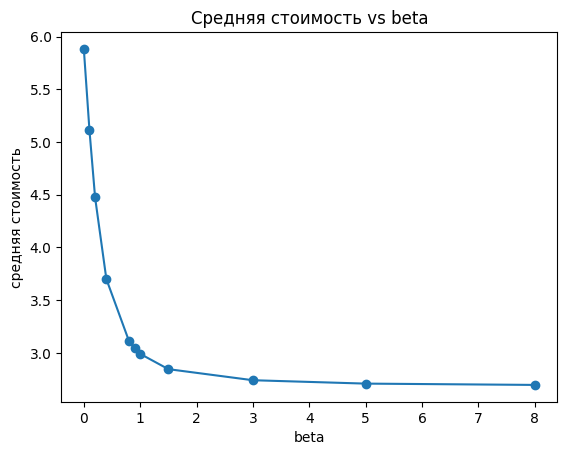

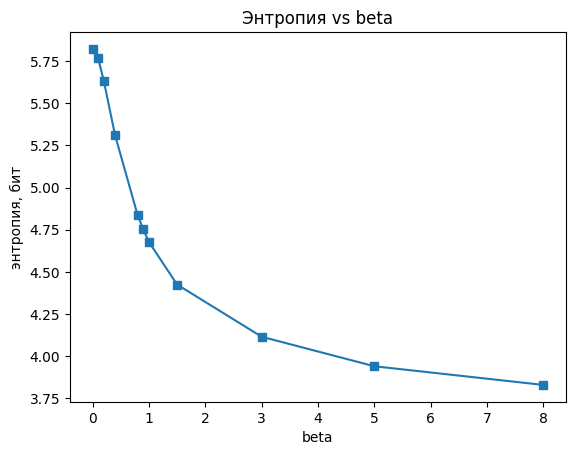

In [60]:
# Кривые c(β) и H(β)
plt.figure()
plt.plot(df_scan["beta"], df_scan["mean_cost"], marker="o")
plt.xlabel("beta")
plt.ylabel("средняя стоимость")
plt.title("Средняя стоимость vs beta")
plt.show()

plt.figure()
plt.plot(df_scan["beta"], df_scan["entropy_bits"], marker="s")
plt.xlabel("beta")
plt.ylabel("энтропия, бит")
plt.title("Энтропия vs beta")
plt.show()


Что видим: при $β=0$ почти независимость - максимальная стоимость и энтропия.  

По мере роста $β$ уменьшается средняя стоимость (увеличиваем штраф за расстояние) и в какой то момент выходит на плато. При этом же вариативность меньше - значит, энтропия тоже убывает, распределение более предсказуемое.  


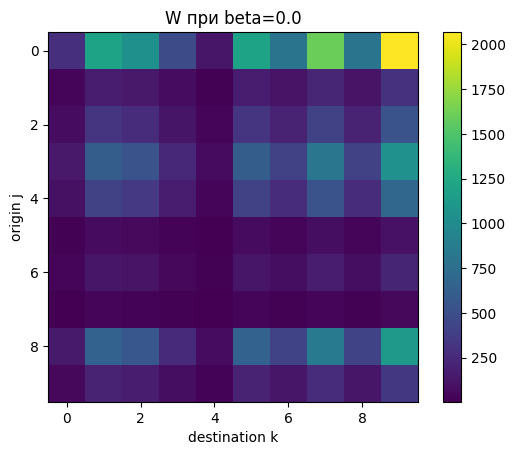

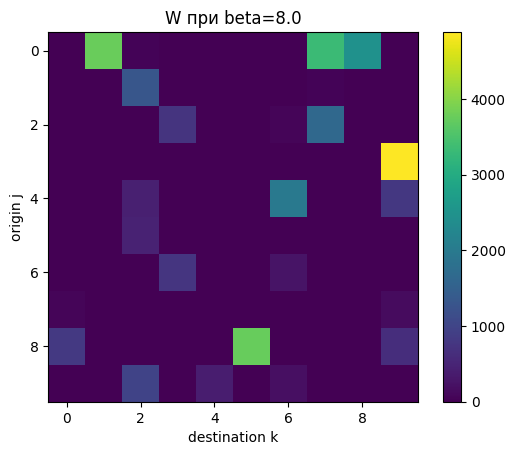

In [61]:
# тепловые карты для наглядности: β=0 и максимальный β
beta_lo, beta_hi = betas[0], betas[-1]
plt.figure()
plt.imshow(Ws[beta_lo])
plt.colorbar()
plt.xlabel("destination k"); plt.ylabel("origin j")
plt.title(f"W при beta={beta_lo}")
plt.show()

plt.figure()
plt.imshow(Ws[beta_hi])
plt.colorbar()
plt.xlabel("destination k"); plt.ylabel("origin j")
plt.title(f"W при beta={beta_hi}")
plt.show()


- при $\beta=0$ (база): $K \equiv 1 \Rightarrow W \approx \frac{r\,c^\top}{N}$ — почти независимость. Карта выглядит «ровной»: яркость строк/столбцов определяется только величинами $r$ и $c$. Светлая клетка — пересечение самых больших $r_j$ и $c_k$.
- при большом $\beta$ : фактор $e^{-\beta C}$ душит дальние связи, масса концентрируется на немногих «дешёвых» парах — однородность пропадает, появляются локальные пики  

In [62]:
def topk_share(W, k=10):
    flat = np.sort(W.ravel())[::-1]
    return flat[:k].sum() / flat.sum()

beta_lo, beta_hi = betas[0], betas[-1]
print("share top-10, beta=",beta_lo, ": ", topk_share(Ws[beta_lo], k=10))
print("share top-10, beta=", beta_hi, ": ", topk_share(Ws[beta_hi], k=10))


share top-10, beta= 0.0 :  0.39220040487675734
share top-10, beta= 8.0 :  0.83007980964089



 **Количественно :** доля массы в 10 самых крупных клетках — при большом $\beta$ заметно больше чем при $\beta=0$.   Значит, небольшая часть клеток несёт гораздо большую долю потока.


## **Литература**

https://ru.wikipedia.org/wiki/Информационная_энтропия  
https://ru.wikipedia.org/wiki/Расстояние_Кульбака_—_Лейблера  
https://ru.wikipedia.org/wiki/Принцип_максимума_энтропии  

